# Demo for OCTXAI
***

In [1]:
%matplotlib inline

import os
import pickle
import matplotlib
import matplotlib.pyplot as plt

from Utils.ExpressiveGradients import *
from Vis.VisualizationTool import *

In [2]:
# Check available GPUs.
print("Available GPUs: {}".format(torch.cuda.device_count()))
print("Use {} GPUs for inference".format(torch.cuda.device_count()))

Available GPUs: 4
Use 4 GPUs for inference


***
#### Define the CNN structure to load model

In [3]:
class Net(nn.Module):
    def __init__(self, num_classes=4):
        super(Net, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(16, 16, 3),
            nn.MaxPool2d(2, 2),
            nn.ReLU(inplace=True),

            nn.Conv2d(16, 32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, 3),
            nn.MaxPool2d(2, 2),
            nn.ReLU(inplace=True),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, 3),
            nn.MaxPool2d(2, 2),
            nn.ReLU(inplace=True)
        )

        self.classifier = nn.Sequential(
            nn.Linear(14 * 41 * 64, 200),
            nn.BatchNorm1d(200),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(200, 20),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(20, num_classes)
        )

    def forward(self, x):
        out = self.features(x)
        out = out.view(-1, 14 * 41 * 64)
        out = self.classifier(out)
        # out = F.softmax(out)
        if self.training:
            pass
        else:
            out = F.softmax(out)
        return out

#### Load model

In [4]:
model = torch.load('./TorchModels/model_NOTnorm_0531.pt')
# print("###############################################################################")
# print("############################# Model Structure #################################")
# print("###############################################################################")
# print(model)
# print("###############################################################################")

#### Load demo images

In [5]:
f1 = open('./Data/Demo_img', 'rb')
images = pickle.load(f1)
f1.close()

f2 = open('./Data/Demo_box', 'rb')
boxes = pickle.load(f2)
f2.close()

f3 = open('./Data/Demo_map', 'rb')
bxmaps = pickle.load(f3)
f3.close()

***
## Visualizatiion: Comparison between IG and EG
- IG: Integrated Gradients (Conventional method)
- EG: Expressive Gradients **(Our method)**
<br>
#### Figures in *'plot_all'* function:
- 1st figure: original image
- 2nd figure: attribution map from the method
- 3rd figure: attribution map with oberlay visualization (red-pixels imply positive impacts on the class)
- 4th figure: attribution map with bounding box visualization (red-box imply positive impacts on the class)

***
### For Dry-OCT image 1

In [6]:
IG00 = integrated_gradients(images[0], model)
EG00 = sum_integrated_gradient(images[0], model)
EG00 = convert_4Dto3D(sum_Ushape_list(EG00))

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  0%|          | 0/6 [00:00<?, ?it/s]/home/lims1/python/OCTXAI/Utils/ExpressiveGradients.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)
100%|██████████| 6/6 [00:10<00:00,  1.68s/it]


#### Integrated Gradients (conventional method)

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/11 [00:00<?, ?it/s]

Label: observation-Dry   /   Score: 0.8924377


100%|██████████| 11/11 [00:08<00:00,  1.25it/s]


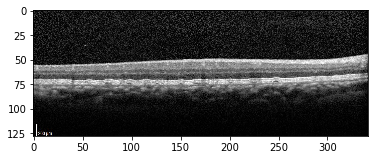

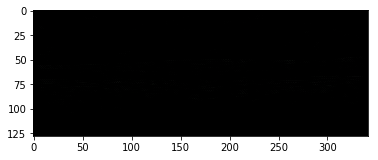

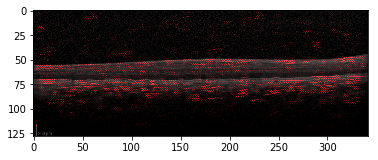

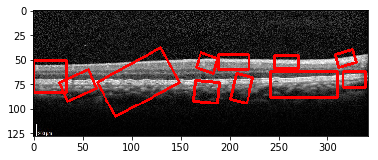

In [7]:
plot_all(images[0], IG00, model)

#### Expressive Gradients **(Our method)**

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/9 [00:00<?, ?it/s]

Label: observation-Dry   /   Score: 0.8924377


100%|██████████| 9/9 [00:07<00:00,  1.18it/s]


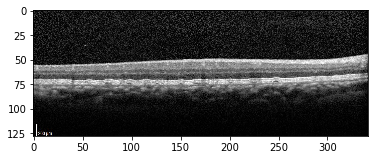

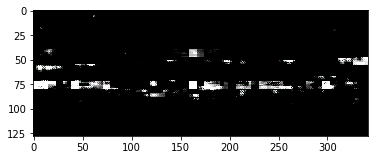

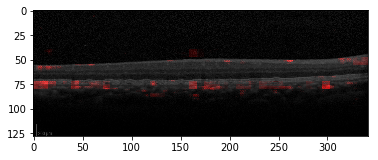

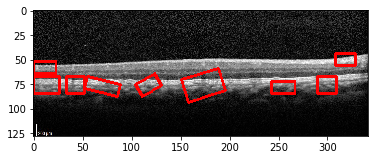

In [8]:
plot_all(images[0], EG00, model)

***

## For Dry-OCT image 2

In [9]:
IG01 = integrated_gradients(images[1], model)
EG01 = sum_integrated_gradient(images[1], model)
EG01 = convert_4Dto3D(sum_Ushape_list(EG01))

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  0%|          | 0/6 [00:00<?, ?it/s]/home/lims1/python/OCTXAI/Utils/ExpressiveGradients.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)
100%|██████████| 6/6 [00:10<00:00,  1.68s/it]


/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/5 [00:00<?, ?it/s]

Label: observation-Dry   /   Score: 0.9998079


100%|██████████| 5/5 [00:03<00:00,  1.28it/s]


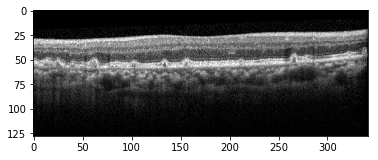

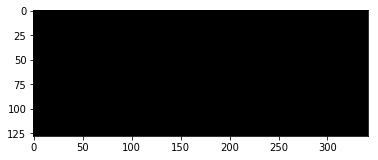

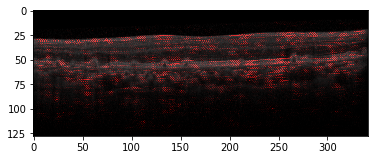

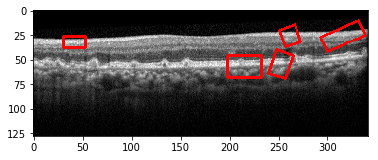

In [10]:
plot_all(images[1], IG01, model)

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/11 [00:00<?, ?it/s]

Label: observation-Dry   /   Score: 0.9998079


100%|██████████| 11/11 [00:09<00:00,  1.17it/s]


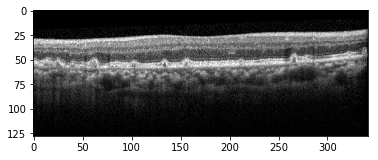

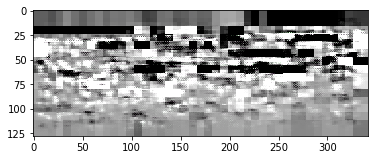

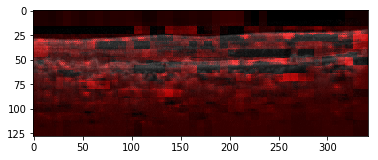

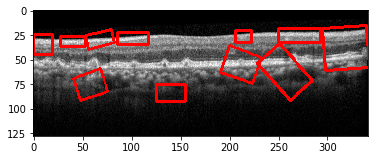

In [11]:
plot_all(images[1], EG01, model)

***

## For Wet-OCT image 1

In [12]:
IG02 = integrated_gradients(images[2], model)
EG02 = sum_integrated_gradient(images[2], model)
EG02 = convert_4Dto3D(sum_Ushape_list(EG02))

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  0%|          | 0/6 [00:00<?, ?it/s]/home/lims1/python/OCTXAI/Utils/ExpressiveGradients.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)
100%|██████████| 6/6 [00:09<00:00,  1.64s/it]


/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/10 [00:00<?, ?it/s]

Label: anti-VEGF   /   Score: 1.0


100%|██████████| 10/10 [00:08<00:00,  1.26it/s]


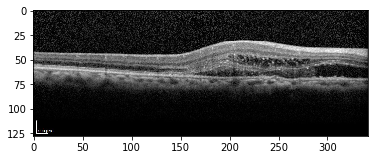

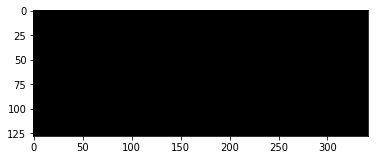

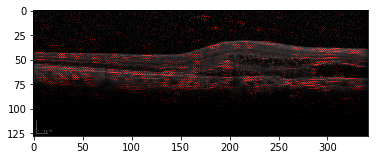

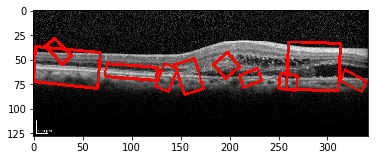

In [13]:
plot_all(images[2], IG02, model)

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/7 [00:00<?, ?it/s]

Label: anti-VEGF   /   Score: 1.0


100%|██████████| 7/7 [00:05<00:00,  1.38it/s]


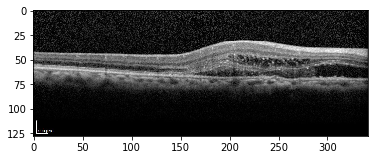

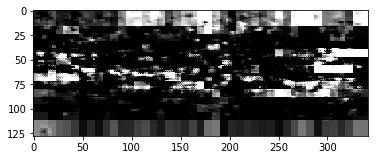

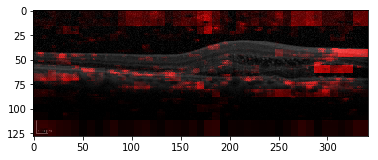

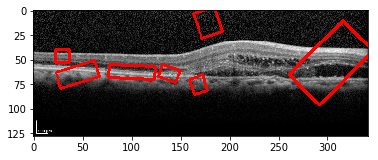

In [14]:
plot_all(images[2], EG02, model)

***

## For Wet-OCT image 2

In [15]:
IG03 = integrated_gradients(images[3], model)
EG03 = sum_integrated_gradient(images[3], model)
EG03 = convert_4Dto3D(sum_Ushape_list(EG03))

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  0%|          | 0/6 [00:00<?, ?it/s]/home/lims1/python/OCTXAI/Utils/ExpressiveGradients.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.softmax(out)
100%|██████████| 6/6 [00:09<00:00,  1.64s/it]


/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/9 [00:00<?, ?it/s]

Label: anti-VEGF   /   Score: 1.0


100%|██████████| 9/9 [00:05<00:00,  1.57it/s]


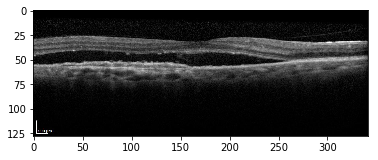

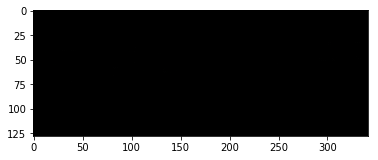

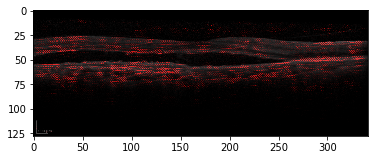

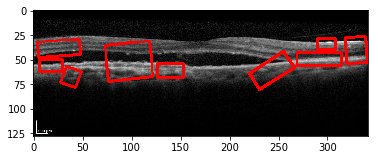

In [16]:
plot_all(images[3], IG03, model)

/home/lims1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/7 [00:00<?, ?it/s]

Label: anti-VEGF   /   Score: 1.0


100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


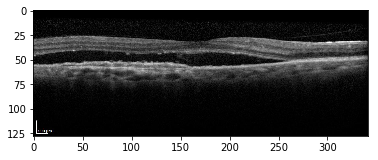

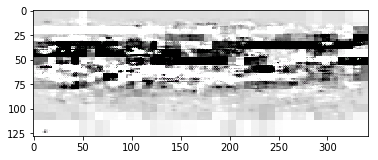

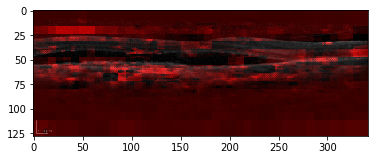

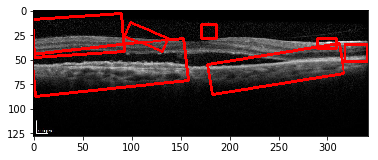

In [17]:
plot_all(images[3], EG03, model)